# WordCloud

In [1]:
import os, re
import numpy as np
import pandas as pd
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

mypath = "./Case Presentation 1"
files = os.listdir(mypath)
from nltk.stem import PorterStemmer

def txt_to_df(files):
    df = pd.DataFrame(columns=["content", "label"])
    for f in files:
        txtFile = open('./Case Presentation 1/'+f, 'r')
        tempTxt = txtFile.read().splitlines()
        flag = False
        content = ""
        
        for line in tempTxt:
            if line[-1:] == ":" : 
                flag = True
                continue
            if flag:
                content += (" " + line)
            
            content = re.sub(r'[^A-Za-z\s]',r' ',content)
            # Lowercase
            content = " ".join([w.lower() for w in content.split()])
            # Remove Stop
            content = " ".join([w for w in content.split() if w not in stop_words])
            # Stemming
            #st = PorterStemmer()
            #content = " ".join([st.stem(w) for w in content.split()])
            # Lemmatisation
            content = " ".join([lemmatizer.lemmatize(w, pos='v') for w in content.split()])
            #content = " ".join([lemmatizer.lemmatize(w, pos='n') for w in content.split()])
                
        if f[:3] == 'CUR':
            label = 'smoker'
        elif f[:3] == 'PAS':
            label = 'past_smoker'
        elif f[:3] == 'NON':
            label = 'non_smoker'
        else:
            label = 'unknown'
            
        df = df.append({
            "content": content,
            "label": label,

        }, ignore_index=True)
    return df

files = os.listdir("./Case Presentation 1/")
df = txt_to_df(files)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wendy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wendy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_x = pd.DataFrame(df.iloc[:,0])
df_y = np.array(df.iloc[:,1])

## Smoker

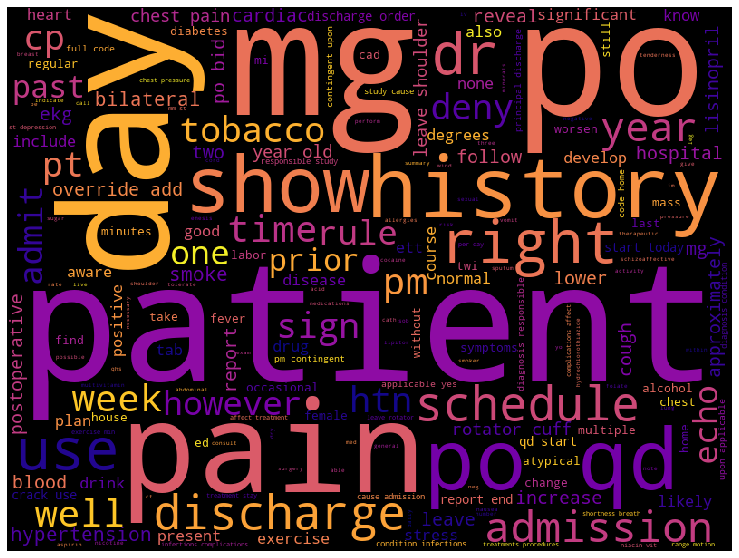

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data, colormap, width = 800, height = 600):
    wordcloud = WordCloud(stopwords = stop_words, colormap = colormap,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df[(df['label'] == 'smoker')]['content']), 'plasma')

## Non-smoker

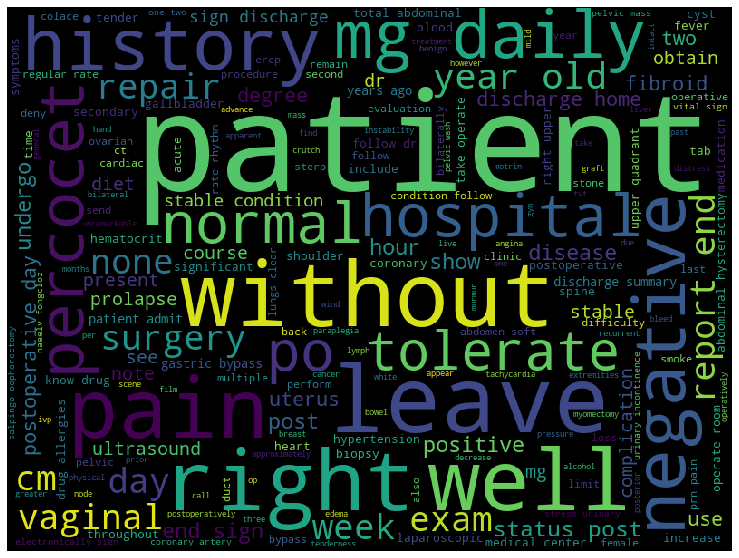

In [4]:
cloud(' '.join(df[(df['label'] == 'non_smoker')]['content']), 'viridis')

## Past-smoker

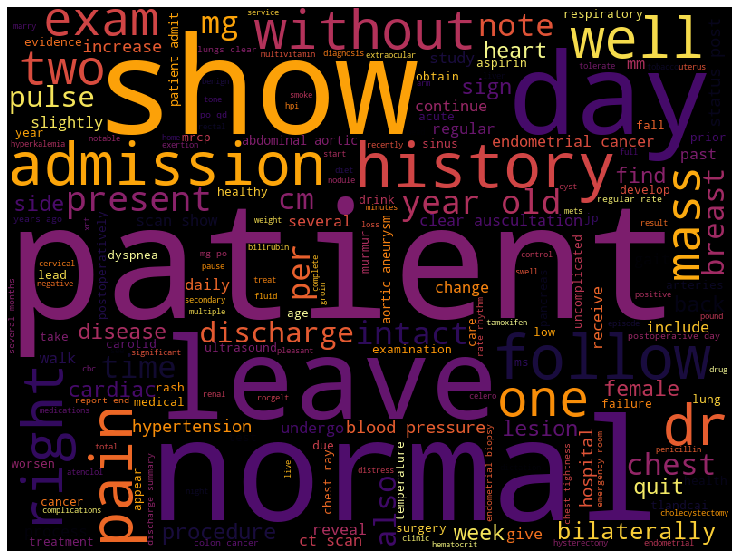

In [5]:
cloud(' '.join(df[(df['label'] == 'past_smoker')]['content']), 'inferno')

## Unknown

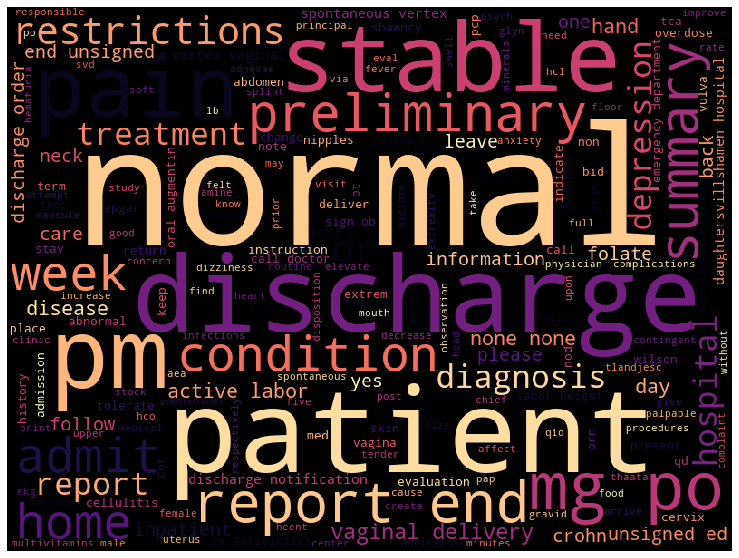

In [6]:
cloud(' '.join(df[(df['label'] == 'unknown')]['content']), 'magma')

C:\Users\wendy\Anaconda3\envs\Keras\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wendy\Anaconda3\envs\Keras\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wendy\Anaconda3\envs\Keras\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

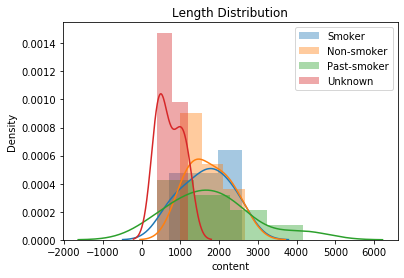

In [7]:
smoker = df[df['label'] == 'smoker']['content'].str.len()
sns.distplot(smoker, label='Smoker')

non_smoker = df[df['label'] == 'non_smoker']['content'].str.len()
sns.distplot(non_smoker, label='Non-smoker')


past_smoker = df[df['label'] == 'past_smoker']['content'].str.len()
sns.distplot(past_smoker, label='Past-smoker')


unknown = df[df['label'] == 'unknown']['content'].str.len()
sns.distplot(unknown, label='Unknown')

plt.title('Length Distribution')
plt.legend()